<a href="https://colab.research.google.com/github/harshjoshi23/CamVid-obj-segmentation/blob/main/ObjSeg_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# Check GPU availability
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


Default GPU Device: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Prep :

In [4]:
base_path = '/content/drive/My Drive/CamVid_Actual'
train_images = os.path.join(base_path, 'train')
train_labels = os.path.join(base_path, 'train_labels')
test_images = os.path.join(base_path, 'test')
test_labels = os.path.join(base_path, 'test_labels')
val_images = os.path.join(base_path, 'val')
val_labels = os.path.join(base_path, 'val_labels')


### **Read and Parse Dataset File Paths:**

In [5]:
train_image_files = [os.path.join(train_images, f) for f in sorted(os.listdir(train_images))]
train_label_files = [os.path.join(train_labels, f) for f in sorted(os.listdir(train_labels))]

val_image_files = [os.path.join(val_images, f) for f in sorted(os.listdir(val_images))]
val_label_files = [os.path.join(val_labels, f) for f in sorted(os.listdir(val_labels))]

test_image_files = [os.path.join(test_images, f) for f in sorted(os.listdir(test_images))]
test_label_files = [os.path.join(test_labels, f) for f in sorted(os.listdir(test_labels))]



### **Testing the Setup**

In [6]:
# Print the Number of Files in Each Directory:
print(f"Number of training images: {len(train_image_files)}")
print(f"Number of training labels: {len(train_label_files)}")
print(f"Number of validation images: {len(val_image_files)}")
print(f"Number of validation labels: {len(val_label_files)}")
print(f"Number of testing images: {len(test_image_files)}")
print(f"Number of testing labels: {len(test_label_files)}")


Number of training images: 369
Number of training labels: 369
Number of validation images: 100
Number of validation labels: 100
Number of testing images: 232
Number of testing labels: 232


In [7]:
# Visualize Sample Images and Corresponding Labels:

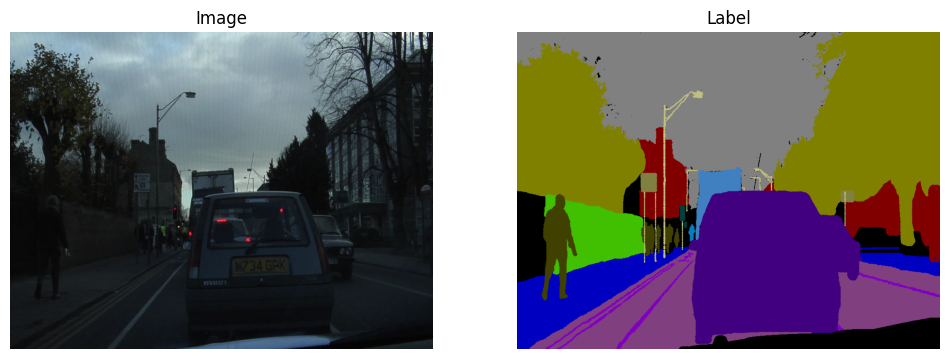

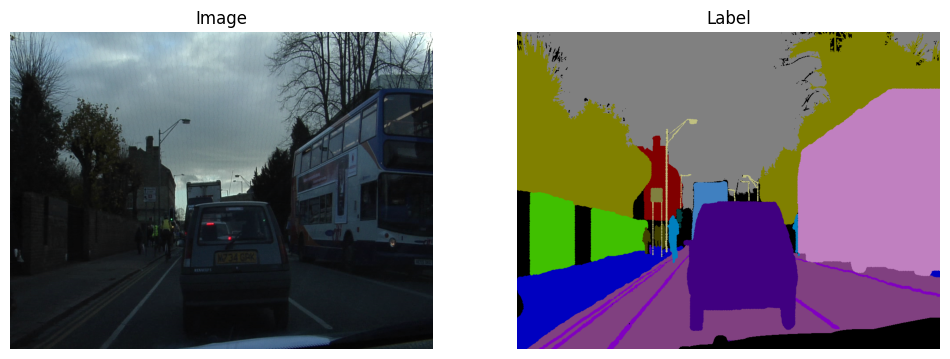

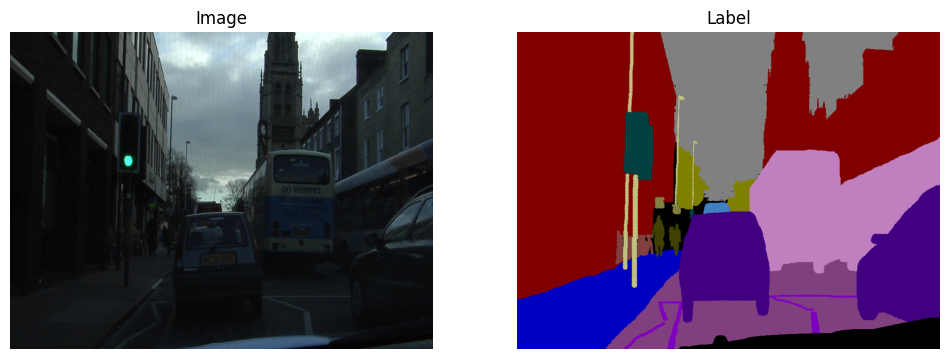

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

def display_image_and_label(image_path, label_path):
    image = Image.open(image_path)
    label = Image.open(label_path)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(label)
    plt.title('Label')
    plt.axis('off')

    plt.show()

# Display a sample image and label from each set
display_image_and_label(train_image_files[0], train_label_files[0])
display_image_and_label(val_image_files[0], val_label_files[0])
display_image_and_label(test_image_files[0], test_label_files[0])


## **3. Custom Dataset Class**

In [9]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image

class CamVidDataset(Dataset):
    def __init__(self, image_files, label_files, image_transform=None, label_transform=None):
        self.image_files = image_files
        self.label_files = label_files
        self.image_transform = image_transform
        self.label_transform = label_transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img = Image.open(self.image_files[idx]).convert('RGB')
        label = Image.open(self.label_files[idx]).convert('L')  # Assuming labels are in grayscale

        if self.image_transform:
            img = self.image_transform(img)

        if self.label_transform:
            label = self.label_transform(label)

        # Convert label to long and remove the channel dimension
        label = torch.squeeze(label, 0).long()

        return img, label

# Define your transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

label_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Usage
train_dataset = CamVidDataset(train_image_files, train_label_files, image_transform=image_transforms, label_transform=label_transforms)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)

val_dataset = CamVidDataset(val_image_files, val_label_files, image_transform=image_transforms, label_transform=label_transforms)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)


### Verification for dL defined above :

In [10]:

# Iterate through the DataLoader to print out the shapes and data types
for images, labels in train_dataloader:
    print(f"Images dtype: {images.dtype}, shape: {images.shape}")
    print(f"Labels dtype: {labels.dtype}, shape: {labels.shape}")
    print(f'Images batch shape: {images.shape}')
    print(f'Labels batch shape: {labels.shape}')
    break  # Remove break if you want to see more batches



# Iterate through the DataLoader to print out the shapes and data types
for images, labels in val_dataloader:
    print(f"Images dtype: {images.dtype}, shape: {images.shape}")
    print(f"Labels dtype: {labels.dtype}, shape: {labels.shape}")
    print(f'Images batch shape: {images.shape}')
    print(f'Labels batch shape: {labels.shape}')
    break  # Remove break if you want to see more batches



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Images dtype: torch.float32, shape: torch.Size([16, 3, 256, 256])
Labels dtype: torch.int64, shape: torch.Size([16, 256, 256])
Images batch shape: torch.Size([16, 3, 256, 256])
Labels batch shape: torch.Size([16, 256, 256])
Images dtype: torch.float32, shape: torch.Size([16, 3, 256, 256])
Labels dtype: torch.int64, shape: torch.Size([16, 256, 256])
Images batch shape: torch.Size([16, 3, 256, 256])
Labels batch shape: torch.Size([16, 256, 256])


In [11]:

# Iterate through the DataLoader to print out the shapes and data types
for images, labels in train_dataloader:
    print(f"Images dtype: {images.dtype}, shape: {images.shape}")
    print(f"Labels dtype: {labels.dtype}, shape: {labels.shape}")
    print(f'Images batch shape: {images.shape}')
    print(f'Labels batch shape: {labels.shape}')
    break  # Remove break if you want to see more batches



# Iterate through the DataLoader to print out the shapes and data types
for images, labels in val_dataloader:
    print(f"Images dtype: {images.dtype}, shape: {images.shape}")
    print(f"Labels dtype: {labels.dtype}, shape: {labels.shape}")
    print(f'Images batch shape: {images.shape}')
    print(f'Labels batch shape: {labels.shape}')
    break  # Remove break if you want to see more batches



Images dtype: torch.float32, shape: torch.Size([16, 3, 256, 256])
Labels dtype: torch.int64, shape: torch.Size([16, 256, 256])
Images batch shape: torch.Size([16, 3, 256, 256])
Labels batch shape: torch.Size([16, 256, 256])
Images dtype: torch.float32, shape: torch.Size([16, 3, 256, 256])
Labels dtype: torch.int64, shape: torch.Size([16, 256, 256])
Images batch shape: torch.Size([16, 3, 256, 256])
Labels batch shape: torch.Size([16, 256, 256])


## **5. Mdoel Defination**

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

"""## Model Definition"""

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 512)
        self.up1 = Up(1024, 256, bilinear)
        self.up2 = Up(512, 128, bilinear)
        self.up3 = Up(256, 64, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits


### Setting up LF and optimizers

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
# from your_unet_model import UNet  # make sure to import your model definition

# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = UNet(n_channels=3, n_classes=12)
model.to(device)  # Move model to the appropriate device

# Check if the model loads to GPU, otherwise revert to CPU temporarily
try:
    model = model.to(device)
except RuntimeError as e:
    print("Model cannot be loaded onto GPU due to:", e)
    device = torch.device('cpu')  # Use CPU temporarily if GPU is out of memory
    model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the model

Basic dummy model

In [16]:
# import torch

# def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     model.to(device)

#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         running_corrects = 0

#         # Training phase
#         for inputs, labels in train_loader:
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             if labels.dim() == 4 and labels.shape[1] == 1:
#                 labels = labels.squeeze(1)  # Ensure labels are the correct shape

#             optimizer.zero_grad()

#             outputs = model(inputs)
#             _, preds = torch.max(outputs, 1)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels).item()

#         epoch_loss = running_loss / len(train_loader.dataset)
#         epoch_acc = running_corrects / len(train_loader.dataset)

#         # Validation phase
#         model.eval()
#         val_running_loss = 0.0
#         val_running_corrects = 0

#         with torch.no_grad():
#             for inputs, labels in val_loader:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 if labels.dim() == 4 and labels.shape[1] == 1:
#                     labels = labels.squeeze(1)  # Ensure labels are the correct shape

#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 val_running_loss += loss.item() * inputs.size(0)
#                 val_running_corrects += torch.sum(preds == labels).item()

#         val_epoch_loss = val_running_loss / len(val_loader.dataset)
#         val_epoch_acc = val_running_corrects / len(val_loader.dataset)

#         print(f'Epoch {epoch + 1}/{num_epochs} - Training Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')
#         print(f'Validation Loss: {val_epoch_loss:.4f}, Acc: {val_epoch_acc:.4f}')

#     return model

# model_ft = train_model(model, train_dataloader, val_dataloader, criterion, optimizer, num_epochs=10)



Epoch 1/10 - Training Loss: 1.6527, Acc: 57608.4878
Validation Loss: 1.4065, Acc: 60698.8800
Epoch 2/10 - Training Loss: 0.7955, Acc: 65346.2141
Validation Loss: 0.6870, Acc: 65514.9400
Epoch 3/10 - Training Loss: 0.3353, Acc: 65527.1897
Validation Loss: 0.2405, Acc: 65536.0000
Epoch 4/10 - Training Loss: 0.1480, Acc: 65534.8103
Validation Loss: 0.1055, Acc: 65536.0000
Epoch 5/10 - Training Loss: 0.0808, Acc: 65535.9837
Validation Loss: 0.0654, Acc: 65536.0000
Epoch 6/10 - Training Loss: 0.0521, Acc: 65536.0000
Validation Loss: 0.0457, Acc: 65536.0000
Epoch 7/10 - Training Loss: 0.0370, Acc: 65536.0000
Validation Loss: 0.0328, Acc: 65533.9600
Epoch 8/10 - Training Loss: 0.0278, Acc: 65536.0000
Validation Loss: 0.0241, Acc: 65536.0000
Epoch 9/10 - Training Loss: 0.0217, Acc: 65536.0000
Validation Loss: 0.0197, Acc: 65536.0000
Epoch 10/10 - Training Loss: 0.0176, Acc: 65536.0000
Validation Loss: 0.0161, Acc: 65536.0000


In [ ]:
import torch
import time
import os

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, save_path='best_model.pth'):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        start_time = time.time()

        # Training phase
        for i, (inputs, labels) in enumerate(train_loader, 1):
            inputs = inputs.to(device)
            labels = labels.to(device)

            if labels.dim() == 4 and labels.shape[1] == 1:
                labels = labels.squeeze(1)  # Ensure labels are the correct shape

            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).item()

            if i % 100 == 0:  # Log every 100 batches
                print(f'Epoch {epoch+1}/{num_epochs} [{i}/{len(train_loader)}] - Loss: {running_loss / (i * inputs.size(0)):.4f} - Acc: {running_corrects / (i * inputs.size(0)):.4f}')

        epoch_duration = time.time() - start_time
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                if labels.dim() == 4 and labels.shape[1] == 1:
                    labels = labels.squeeze(1)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data).item()
                total_val += labels.size(0)

        val_epoch_loss = val_running_loss / total_val
        val_epoch_acc = val_running_corrects / total_val

        print(f'Epoch {epoch + 1}/{num_epochs} - {len(train_loader)} batches [{epoch_duration:.0f}s total] - loss: {epoch_loss:.4f} - acc: {epoch_acc:.4f}')
        print(f'val_loss: {val_epoch_loss:.4f} - val_acc: {val_epoch_acc:.4f}')

        # Save the best model
        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            torch.save(model.state_dict(), save_path)
            print(f'Validation loss improved to {val_epoch_loss:.4f}, saving model to {save_path}')

    return model

# Example usage
model_ft = train_model(model, train_dataloader, val_dataloader, criterion, optimizer, num_epochs=10)


Epoch 1/10 - 24 batches [23s total] - loss: 0.0095 - acc: 65536.0000
val_loss: 0.0091 - val_acc: 65536.0000
Validation loss improved to 0.0091, saving model to best_model.pth
Epoch 2/10 - 24 batches [21s total] - loss: 0.0082 - acc: 65536.0000
val_loss: 0.0079 - val_acc: 65536.0000
Validation loss improved to 0.0079, saving model to best_model.pth
Epoch 3/10 - 24 batches [22s total] - loss: 0.0072 - acc: 65536.0000
val_loss: 0.0069 - val_acc: 65536.0000
Validation loss improved to 0.0069, saving model to best_model.pth
Epoch 4/10 - 24 batches [21s total] - loss: 0.0064 - acc: 65536.0000
val_loss: 0.0061 - val_acc: 65536.0000
Validation loss improved to 0.0061, saving model to best_model.pth
Epoch 5/10 - 24 batches [21s total] - loss: 0.0057 - acc: 65536.0000
val_loss: 0.0055 - val_acc: 65536.0000
Validation loss improved to 0.0055, saving model to best_model.pth
Epoch 6/10 - 24 batches [22s total] - loss: 0.0051 - acc: 65536.0000
val_loss: 0.0050 - val_acc: 65536.0000
Validation loss i

In [15]:
break

SyntaxError: 'break' outside loop (<ipython-input-15-6aaf1f276005>, line 1)